# Microtraining - Data-Analysis with Keras and Tensorflow

## Getting started with feed forward neural networks


In [1]:
# Checking your Jupyter notebook
# Press Ctrl+Enter to run me
print("Hello world")

Hello world


This Training will show you the basics steps you will need to perform, to get started with Deep Learning on your dataset. The main goal is to give a short introduction into the most important stages of data analysis with supervised neural networks. 

The main stages are: 
* Data preprocessing
* Model setup
* Model training
* Model testing
* (Inference)
* (Deployment)

## Tensorflow and Keras

![Tensorflow](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg)




<sup>Imagesource:https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg</sup>

[Tensorflow](https://www.tensorflow.org/) is a opensource framework provided and developed for machine and deep learning. The main purpose is to provide an easy and effective way to manipulate and calculate tensors.  

One of the key features of tensorflow is the ability to build computation graphs. These computation graphs can be build by using a High-Level language like Python. Afterwards these graphs are than initiated and executed in C++.
The image below shows such a typical computation. A Input Tensor "flows" through" the graph.

<center><img src="https://www.tensorflow.org/images/tensors_flowing.gif"></center>


<sup>Imagesource:https://www.tensorflow.org/images/tensors_flowing.gif</sup>


<center><img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="300"></center>


<sup>Imagesource:https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png</sup>

[Keras](https://keras.io/) is a wrapper library, which provides an easy and highly abstracted interface for low level frameworks like Tensorflow. Standard layers like Dense layers or CNN layers are already included in Keras making it the goto framework if you want to build fast prototype networks. Of course the great flexibilty Tensorflow can provide gets lost, when you use Keras but it is possible to combine these two frameworks since Keras is basically just a wrapper for Tensorflow.   


In this workshop we will just import Tensorflow since Keras is part of tensorflow since Tensorflow 1.2.

# Let´s code 

In this micro training we are going to build a supervised classification alghorithmn to detect a focus shift during lasercutting.
The following parts will be build:
* Preprocessing Pipeline
* Neural Network Model
* Loss calculation
* Optimizer
* Training
* Evaluation


## Libraries

In [44]:
#imports for the scripts
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Data preprocessing pipeline

* **Preprocessing Pipeline**
* Neural Network Model
* Loss calculation
* Optimizer
* Training
* Evaluation




Data preprocessing is all about getting your data ready for your analysis. Normally this step takes about 80%-90% of the time spend to build a neural network. 

When building neural networks you typically perform the following steps during this process:
* Data loading
* (Removing unwanted or corrupted data)
* Creating Labels
* Combine datasets
* Shuffel
* Data normalization
* Split


## The dataset
<img src="./pics_jupyter/Experimentaufbau.png">

* 4000 PNG Images
* 2 Classes (-1mm and 2mm)
* seperated by folders

The given Dataset was produced on a Tumpf TruLas 5030 Lasercutting System. A highspeed Camerasystem was used to monitor the meltpool behaviour during the cut. In this dataset 2 different cuts were made. The focus position of the Laserbeam was varied (-1mm and 2mm).



## Data loading

Our dataset is loaded by a prewritten loader. 

The loader is iterating over every element of the folders [fokus+2](./fokus+2) and [fokus-1](./fokus-1) and loading it with OpenCV. 

Afterwards it returns two numpy arrays. The returned arrays have the dimensions `(Framenumber,Width,Height)` 

In [45]:
# import dataset loader
from PictureLoader import PictureLoader
# import clear for console
from IPython.display import clear_output

# load the dataset and clear Output afterwards
Loader = PictureLoader()
pics_1, pics_2 = Loader.LoadPictures()
clear_output()


Focus 1 Dimensions  (2000, 256, 256)
Focus 2 Dimensions  (2000, 256, 256)


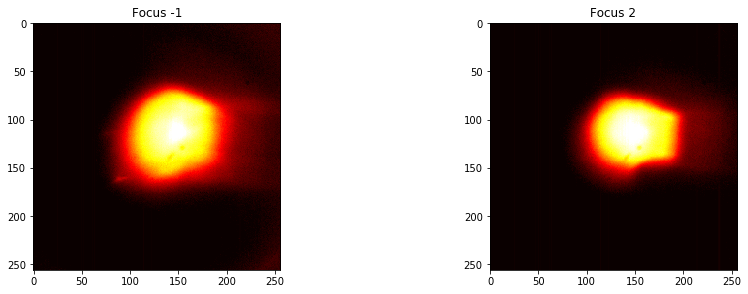

In [46]:
#Change me for different frames
pic1_frame = 0
pic2_frame = 0

# Show dimensions of the Datasets
print("Focus 1 Dimensions ", pics_1.shape)
print("Focus 2 Dimensions ", pics_2.shape)

#Plotting
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Focus -1")
plt.imshow(pics_1[pic1_frame,:,:],cmap="hot")
plt.subplot(2,2,2)
plt.title("Focus 2")
_ = plt.imshow(pics_2[pic2_frame,:,:],cmap="hot")

## Create Labels

To build supervised learning algorithms we need labeled data. Since we are performing a classification we will use ***one-hot-encoding***. 
<img src="./pics_jupyter/OneHotEncoding.PNG" width="450">

In [47]:
# Gernerate Labels for the dataset in onehot encoding
labels_1 = np.repeat([[1,0]],pics_1.shape[0],axis=0)
labels_2 = np.repeat([[0,1]],pics_2.shape[0],axis=0)
print("Labels 1 first example\n",labels_1[0],"\n")
print("Labels 2 first example\n",labels_2[0],"\n")
print("Labels 1 Dimension\n",labels_1.shape,"\n")

Labels 1 first example
 [1 0] 

Labels 2 first example
 [0 1] 

Labels 1 Dimension
 (2000, 2) 



## Combine Datasets

To feed labeled and loaded datasets into our network we need to merge these datasets. This is done by numpy's `append` function.

In [49]:
# Create combined dataset

images = np.append(pics_1,pics_2,axis=0)
labels = np.append(labels_1,labels_2,axis=0)
print("Dataset dimensions after merging",images.shape)

Dataset dimensions after merging (4000, 256, 256)


## Shuffle dataset

Normally networks are trained in batches. In cases where one label of the dataset is bigger than our batch size it can happen that the optimization algorithm converges to a local minima only found in one of the labeled datasets. To prevend this kind of behaviour the datasets are shuffled to minimize the effect of label depending minimas. 

In [50]:
# Shuffle data
rng_state = np.random.get_state()
np.random.shuffle(images)
np.random.set_state(rng_state)
np.random.shuffle(labels)

## Data normalization
Most machine learning algorithmns will not work correctly when the datarange of your input data differs too much from your selected weights. Therefore we will normalise the datarange of the input data.

The maximum value of a grey scale pixel is $255$. The minimum is $0$  
Dividing your dataset by $255$ scales your pixel values in a range between $0$ and $1$ 

In [4]:
images_normal = images / 255
print("Max Value Images before normalization", np.max(images))
print("Max Value Images after normalization", np.max(images_normal))

NameError: name 'images' is not defined

## Split dataset
In order to test and evaluate our network after creation we need to create a _"benchmark"_ dataset. We do this by splitting our data into 2 different datasets. A train- and a test-dataset. 

In [3]:
# How much Traindata do you want?
train_percentage = 0.9

# Split your data
split = int(images_normal.shape[0]*train_percentage)
train_images = images_normal[:split]
test_images = images_normal[split:]
train_labels = labels[:split]
test_labels = labels[split:]
# Logging
print("Train-dataset:")
print(train_images.shape)
print(train_labels.shape)
print("\nTest-dataset:")
print(test_images.shape)
print(test_labels.shape)



NameError: name 'images_normal' is not defined

# Neural Network model
* Preprocessing Pipeline
* **Neural Network Model**
* Loss calculation
* Optimizer
* Training
* Evaluation

## Layers 
The model defines the overall architecture of the neural network. In the model you can define different layers and there sizes.
Common layers in a network are:
* Downscaling layers
$$ x^{m  \times  n} \rightarrow x^{(\frac{m}{s} \times \frac{n}{s})} $$ 


* Reshape/Flatten layers
$$ x^{m \times n} \leftrightarrow x^{(m + n)} $$ 


* Dense layers 
$$ y^n =  f(W^{m x n}* x^m +b^n) $$


* (Dropout layers)


* (CNN layers)

Here you can find a list of all standard layers implemented in [Keras](https://keras.io/layers/core/)

## Activation functions
The activation function $f$ in dense layers is used to determine the output of this layer. You can use a dense layer as a hidden or a output layer:

Commonly used functions are:


* Sigmoid 
$$ \frac{e^x}{e^x+1} $$


* ReLU
$$ max(0,x) $$


* Softmax (Classification Output layer)
$$ y_i= \frac{e^{g_i}}{\sum_j{e^{g_j}}} $$

List of all implemented [Activations](https://keras.io/activations/) in Keras.

In [53]:
# Build Architecture

model = tf.keras.models.Sequential([
#Downsampling
  tf.keras.layers.Reshape((256,256,1),input_shape=(256,256)),
  tf.keras.layers.AveragePooling2D(pool_size=(4, 4)),
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(100, activation=tf.nn.relu),

  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])



# Loss function and Optimization
* Preprocessing Pipeline
* Neural Network Model
* **Loss calculation**
* **Optimizer**
* Training
* Evaluation

# Loss function

The loss function of your neural network defines the relationship between your true label $\bar{y}$ and your predicted label $y$. By defining a lossfunction $f$ and setting this loss to $0$ a optimization problem is created.

$$f(y(w,x),\bar{y}(x))\stackrel{!}{=}0$$


The most commonly used for categorisations functions are:

* Mean squared error:
$$ \sum_{ i=0 }^n { \frac{ (y_{ i }-\bar{y_{i}})^2}{ n } } $$

* Categorical cross entropy:
$$ -\sum_{i=0}^n {y_{i}*\log (\bar{y_{i}}) } $$

Keras already has a lot loss functions implemented. Take a look [here](https://keras.io/losses/).

## Optimization  

The definition of your network determines size of your network directly. A single dense layer creates $ m \cdot n + n $ free variables. Since we are using non linear functions like **ReLU** as activation functions we can not simply solve these equation systems.

The Optimizer plays a crutial role during your training phase. It is responsible for changing your weights $W$ and your bias $b$ the "right" amount after every iteration. 

For gradient descent the most important parameters is the **learning rate**

<img src="https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png" width="400">

<sup>Imagesource:https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png</sup>

You can find more [optimizers](https://keras.io/optimizers/) here.

In [55]:
# Model compilation

loss_function = "mean_squared_error"
optimizer = tf.keras.optimizers.SGD(lr=0.01)

model.compile(optimizer,
              loss=loss_function,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 256, 256, 1)       0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 64, 64, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               409700    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 409,902
Trainable params: 409,902
Non-trainable params: 0
_________________________________________________________________
None


# Training
* Preprocessing Pipeline
* Neural Network Model
* Loss calculation
* Optimizer
* **Training**
* Evaluation

## Training
In this step we feed our data into out neural network and change the weights iterativly. The most important factors during this phase are:
* Train Dataset   
    ($x$ and $\bar{y}$)  
    
    
* Batch Size  
    How many samples do you want to load for each Train step  
    
    
* Epochs  
    How often do you want to train your dataset

In [56]:
# Logging
from time import time
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="graph/{}".format(time()))

# Training
_ = model.fit(train_images, train_labels, batch_size=100, epochs=2, verbose=1, callbacks=[tensorboard])

Epoch 1/2
3600/3600 [==============================] - 5s 1ms/step - loss: 0.1580 - acc: 0.8944
Epoch 2/2
3600/3600 [==============================] - 5s 1ms/step - loss: 0.0623 - acc: 1.0000


# Evaluation
* Preprocessing Pipeline
* Neural Network Model
* Loss calculation
* Optimizer
* Training
* **Evaluation**

In [94]:
# Test
loss,acc = model.evaluate(test_images, test_labels)
print("Average loss of your test data:\n",loss)
print("Accuracy of your prediction:\n",acc*100,"%")

400/400 [==============================] - 1s 1ms/step
Average loss of your test data:
 0.04116932898759842
Accuracy of your prediction:
 100.0 %


## Use your model


True Categorie:
 [1 0]

Predicted Categorie:
 [[0.7244133  0.27558672]]


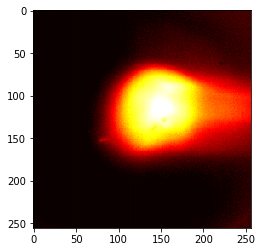

In [91]:
# Predict
predict_frame = 1000
#Get true and predicted categories
true_categorie = labels[predict_frame]
predicted_categorie = model.predict(images_normal[predict_frame].reshape([1,256,256]))

print("\nTrue Categorie:\n",true_categorie)
print("\nPredicted Categorie:\n",predicted_categorie)
_ = plt.imshow(pics_1[predict_frame,:,:],cmap="hot")

## Exercise 1

Run the whole Pipeline on your laptop. 

Change the `predict_frame` variable in your prediction cell to try out your new ai model.


## Exercise 2
Change it up. 
Make sure to re-run your Model definition and Compilation after each step.
After that you can train and evaluate your model again.


* Change the size of your layers by changing the node count of  `tf.keras.layers.Dense(100, activation=tf.nn.relu)` in your model definition  



* Add more layers to your network by copying `tf.keras.layers.Dense(100, activation=tf.nn.relu)` (Hint: Watch out for the comma)


* Decrease the learning rate to 0.0001


* Increase the size of your network to at least 500 nodes for each layer. 


* Run your training phase with 10 instead of 3 epochs.


* Remove your nomalization by removing `/255` from the Data normalization cell. Watch your accuracy and loss during training!  
(Re-run every cell after that to reset your pipeline) 


## Watch what you did

Tensorboard is Tensorflow logging and monitoring webinterfaces. In this interface you can take a look at the accuracy and losses you scored for your different models. You can also visualize the Graph definition. 

Windows:
    Open your Tensorboard by running the **start_tensorboard.bat** file in the Anaconda prompt. Copy the URL that is given by the Program and paste it in your browser.



<img src="./pics_jupyter/Tensorboard.png">

## Advanced Exercise/Homework

* Create a Convolutional neural network by including  [Conv2D](https://keras.io/layers/convolutional/#conv2d) and 
[MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) layers. 

* Rewrite `PictureLoader.py`to use Python [Generators](https://wiki.python.org/moin/Generators) instead of loading the whole dataset at once. By using generators you can use bigger datasets than your RAM.

* Try out a new dataset from [Kaggle](https://www.kaggle.com/datasets) and create a new model


# Tips & Tricks

1. Speed up your training with a GPU acceleration! Install the Anaconda package with `conda install -c anaconda tensorflow-gpu` instead of pip to avoid complications!
2. [How to combine Keras with Tensorflow](https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html)
3. Log what you are doing by using [GIT](https://git-scm.com/)
4. Clean data is key!
5. Have fun!


# Download this Repository
https://github.com/Smokrow/Microtraining